In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
goi1 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/goi1.jpg',cv2.IMREAD_GRAYSCALE)
goi2 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/goi2.jpg',cv2.IMREAD_GRAYSCALE)


orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(goi1,None)
kp2, des2 = orb.detectAndCompute(goi2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

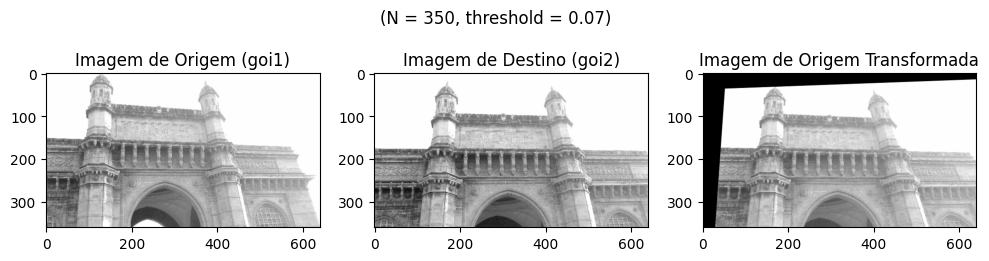

In [59]:
N =350
best_H = None
best_inliers = []
threshold = 0.07

for i in range(N):

    # choosing 4 random correspondences
    random_matches = np.random.choice(matches, 4, replace=False)

    # src_pts: array coords first img (randomly chosen)
    # dst_pts: array destination img 
    # We use them to estimate homography between images
    
    src_pts = np.float32([kp1[m.queryIdx].pt for m in random_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in random_matches]).reshape(-1, 1, 2)
    
    # Homography 
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)
    
    inliers = []
    
    # Projection error and inlier checking
    for match in matches:
        src_pt = kp1[match.queryIdx].pt
        dst_pt = kp2[match.trainIdx].pt
        
        projected_pt = np.dot(H, np.array([src_pt[0], src_pt[1], 1]))
        projected_pt /= projected_pt[2]
        
        error = np.sqrt((projected_pt[0] - dst_pt[0])**2 + (projected_pt[1] - dst_pt[1])**2)
        
        if error < threshold:
            inliers.append(match)
    
    if len(inliers) > len(best_inliers):
        best_H = H
        best_inliers = inliers

# Apply homography
result_img = cv2.warpPerspective(goi1, best_H, (goi2.shape[1], goi2.shape[0]))


plt.figure(figsize=(12, 6))
plt.suptitle(f'(N = {N}, threshold = {threshold})',y=0.73)

plt.subplot(1, 3, 1)
plt.imshow(goi1, cmap='gray')
plt.title('Imagem de Origem (goi1)')

plt.subplot(1, 3, 2)
plt.imshow(goi2, cmap='gray')
plt.title('Imagem de Destino (goi2)')

plt.subplot(1, 3, 3)
plt.imshow(result_img, cmap='gray')
plt.title('Imagem de Origem Transformada')
plt.show()

125.62486817749652
123.08391226029873
33.24519445065633
85.6140265421062
8.651730298607076
73.23720836842584
4.045393674462044
13.46155024363772
4.360916645067113
84.44212971903124
3.4224270219716276e-13
64.67767580236847
20.39834503307371
84.09482618112996
132.8413420364178
1.4510330600887416
25.59206461716494
72.95136126980597
114.33411841418977
1.1368683772161603e-13
100.79179726701634
2.8071522909984243
27.54288395712952
50.98867978303249
4.174817456592662
20.739794215969493
9.820838119116498
73.51880379041451
51.68203364382281
10.91978837993757
116.79150279919003
2.276485634217717
3.5731660388783615
4.882382660821033
126.71926369930603
125.51083903467524
99.21595850648123
84.22285556478734
4.424038261967441
73.52333005070712
72.4096258633405
118.14946008628812
6.197425672066188
2.9673135796061134e-13
56.968877916401894
61.87340658473279
134.8165076646543
149.04171613110006
2.12775669907365
62.41646834776838
70.30998404803363
1.677099205767854
30.676949544531777
99.77535454047917
1

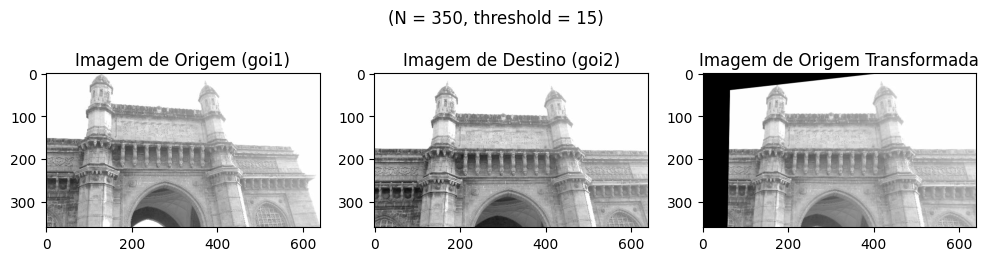

In [67]:
N =350
best_H = None
best_inliers = []
threshold = 15

for i in range(N):

    # choosing 4 random correspondences
    random_matches = np.random.choice(matches, 4, replace=False)

    # src_pts: array coords first img (randomly chosen)
    # dst_pts: array destination img 
    # We use them to estimate homography between images
    
    src_pts = np.float32([kp1[m.queryIdx].pt for m in random_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in random_matches]).reshape(-1, 1, 2)
    
    # Homography 
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)
    
    inliers = []
    
    # Projection error and inlier checking
    for match in matches:
        src_pt = kp1[match.queryIdx].pt
        dst_pt = kp2[match.trainIdx].pt
        
        projected_pt = np.dot(H, np.array([src_pt[0], src_pt[1], 1]))
        projected_pt /= projected_pt[2]
        
        error = np.sqrt((projected_pt[0] - dst_pt[0])**2 + (projected_pt[1] - dst_pt[1])**2)
        print(error)
        
        if error < threshold:
            inliers.append(match)
    
    if len(inliers) > len(best_inliers):
        best_H = H
        best_inliers = inliers

# Apply homography
result_img = cv2.warpPerspective(goi1, best_H, (goi2.shape[1], goi2.shape[0]))


plt.figure(figsize=(12, 6))
plt.suptitle(f'(N = {N}, threshold = {threshold})',y=0.73)

plt.subplot(1, 3, 1)
plt.imshow(goi1, cmap='gray')
plt.title('Imagem de Origem (goi1)')

plt.subplot(1, 3, 2)
plt.imshow(goi2, cmap='gray')
plt.title('Imagem de Destino (goi2)')

plt.subplot(1, 3, 3)
plt.imshow(result_img, cmap='gray')
plt.title('Imagem de Origem Transformada')
plt.show()

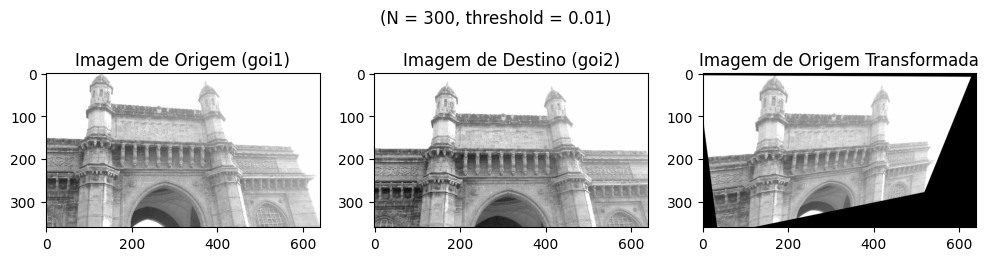

In [70]:
N = 300
best_H = None
best_inliers = []
threshold = 0.01

for i in range(N):

    # choosing 4 random correspondences
    random_matches = np.random.choice(matches, 4, replace=False)

    # src_pts: array coords first img (randomly chosen)
    # dst_pts: array destination img 
    # We use them to estimate homography between images
    
    src_pts = np.float32([kp1[m.queryIdx].pt for m in random_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in random_matches]).reshape(-1, 1, 2)
    
    # Homography 
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)
    
    inliers = []
    
    # Projection error and inlier checking
    for match in matches:
        src_pt = kp1[match.queryIdx].pt
        dst_pt = kp2[match.trainIdx].pt
        
        projected_pt = np.dot(H, np.array([src_pt[0], src_pt[1], 1]))
        projected_pt /= projected_pt[2]
        
        error = np.sqrt((projected_pt[0] - dst_pt[0])**2 + (projected_pt[1] - dst_pt[1])**2)
        
        if error < threshold:
            inliers.append(match)
    
    if len(inliers) > len(best_inliers):
        best_H = H
        best_inliers = inliers

# Apply homography
result_img = cv2.warpPerspective(goi1, best_H, (goi2.shape[1], goi2.shape[0]))


plt.figure(figsize=(12, 6))
plt.suptitle(f'(N = {N}, threshold = {threshold})',y=0.73)

plt.subplot(1, 3, 1)
plt.imshow(goi1, cmap='gray')
plt.title('Imagem de Origem (goi1)')

plt.subplot(1, 3, 2)
plt.imshow(goi2, cmap='gray')
plt.title('Imagem de Destino (goi2)')

plt.subplot(1, 3, 3)
plt.imshow(result_img, cmap='gray')
plt.title('Imagem de Origem Transformada')
plt.show()